In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

#https://towardsdatascience.com/time-series-forecasting-with-pycaret-regression-module-237b703a0c63
#https://www.kaggle.com/ryanholbrook/linear-regression-with-time-series

In [2]:
df = pd.read_csv("data/trip.csv",error_bad_lines=False,usecols=['trip_id','starttime','stoptime',
                                                                'bikeid','tripduration','from_station_name',
                                                               'to_station_name','from_station_id','to_station_id','usertype'])
df = df.drop_duplicates()

In [3]:
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

In [4]:
df.shape

(236066, 10)

In [5]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member


In [6]:
df.dtypes

trip_id                       int64
starttime            datetime64[ns]
stoptime             datetime64[ns]
bikeid                       object
tripduration                float64
from_station_name            object
to_station_name              object
from_station_id              object
to_station_id                object
usertype                     object
dtype: object

In [7]:
time_series = df[['trip_id']].groupby(df.starttime.dt.date).count()

<AxesSubplot:xlabel='starttime'>

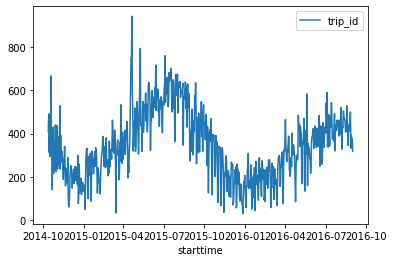

In [8]:
sns.lineplot(data=time_series)

In [9]:
time_series.rename(columns={"trip_id":"nb_trips"},inplace=True)

In [10]:
time_series['time']= np.arange(len(time_series.index))
time_series['lag'] = time_series['nb_trips'].shift(1)

In [11]:
time_series

,nb_trips,time,lag
starttime,,,
2014-10-13,409,0,NaN
2014-10-14,491,1,409.0
2014-10-15,313,2,491.0
2014-10-16,395,3,313.0
2014-10-17,294,4,395.0
...,...,...,...
2016-08-27,333,684,500.0
2016-08-28,392,685,333.0
2016-08-29,369,686,392.0


In [25]:
from sklearn.linear_model import LinearRegression

X = time_series.iloc[1:650]['lag'].to_numpy().reshape(-1, 1)
y = time_series.iloc[1:650]['nb_trips'].to_numpy().reshape(-1, 1)

reg = LinearRegression().fit(X,y)

In [37]:
y_pred = reg.predict(time_series.iloc[650::]['lag'].to_numpy().reshape(-1, 1))
real_y = time_series.iloc[650::]['nb_trips'].to_numpy().reshape(-1, 1)

<AxesSubplot:>

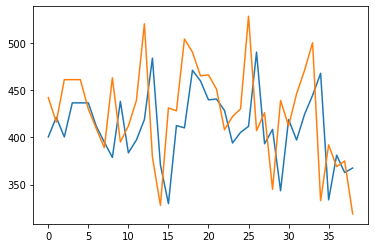

In [39]:
sns.lineplot(x=np.arange(0,len(y_pred)),y=y_pred.flatten())
sns.lineplot(x=np.arange(0,len(y_pred)),y=real_y.flatten())

In [47]:
np.sqrt(np.mean(np.square(real_y-y_pred)))

57.75945573836549